In [120]:
import pandas as pd
import numpy as np
import time


1. Loading csv file

In [122]:
#loading data
data = pd.read_csv('sleepdata.csv',sep = ';')
#recommendationItems = pd.read_csv('recommendationItems.csv',sep =',')
df = pd.DataFrame(data)
print(df)

                   Start                  End Sleep Quality Regularity  Mood  \
0    2019-01-02 00:04:23  2019-01-02 07:57:37           70%         0%   NaN   
1    2019-01-03 00:31:40  2019-01-03 07:40:37           65%         0%   NaN   
2    2019-01-04 00:17:13  2019-01-04 07:41:03           68%        98%   NaN   
3    2019-01-07 00:13:22  2019-01-07 07:40:04           63%        99%   NaN   
4    2019-01-08 00:21:30  2019-01-08 07:52:22           77%        97%   NaN   
..                   ...                  ...           ...        ...   ...   
468  2023-01-20 02:01:51  2023-01-20 08:01:16           66%        84%   NaN   
469  2023-01-21 03:37:34  2023-01-21 10:43:13           70%        78%   NaN   
470  2023-01-22 03:36:55  2023-01-22 10:00:27           50%        79%   NaN   
471  2023-01-23 01:32:49  2023-01-23 07:01:41           53%        72%   NaN   
472  2023-01-23 23:21:27  2023-01-24 04:59:54           58%        72%   NaN   

     Heart rate (bpm)  Steps Alarm mode

2. Methods

In [123]:
def showHistogram(dataFrame,x_axis_label,y_axis_label):
    temp = dataFrame
    dataFrameLength = len(temp)
    #print(dataFrameLength)
    
    hist = temp.plot(kind = "bar",x=x_axis_label, y = y_axis_label ,legend = False)
    hist.set_title(y_axis_label)
    hist.set_xlabel("")
    

In [134]:
# 1 sleep cycle = 90 mins = 5400 s
# 6 cycles, 9h of sleep = 32400s - recommended for long-sleepers 
# 5 cycles, 7h30m of sleep = 27000s - recommended for average-sleepers
# 4 cycles, 6h of sleep - recommended for short-sleepers
def idealSleepTime(sleeper,sleep_duration):
    message = ""
    if(sleeper == 1 ):
        message+="We determine you as a short sleeper. "
        if(sleep_duration<= 18000):                     #less than 5 hr of sleep
            message+="You didn't get enough sleep last night. Try to get at least 6h of sleep(4 sleep cycles)."
        else:
            message+="Keep up with your current sleep routine."
    elif(sleeper == 2):
        message+="We determine you as an average sleeper. "
        if(sleep_duration<= 23400):                      #less than 6 hr and 30 mins of sleep
            message+="You didn't get enough sleep last night. Try to get at least 7h and 30 mins of sleep(5 sleep cycles)."
        else:
            message+="Keep up with your current sleep routine."
    else:
        message+="We determine you as a long sleeper. "
        if(sleep_duration<= 28800):                      #less than 8 hr of sleep
            message+="You didn't get enough sleep last night. Try to get at least 9h of sleep(6 sleep cycles)."
        else:
            message+="Keep up with your current sleep routine."
    return message
    
    

3. Statistics

In [125]:
#SleepDuration

#AVG_OVERALL_SLEEP_DURATION
avg_sleep_duration = df["Time asleep (seconds)"].mean()    # (seconds)
print("The average of overall Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(avg_sleep_duration)))

#Avg last 30 days SleepDuration
#print(df["Time asleep (seconds)"].iloc[-30:])             # get the last 30 rows of data with column = "Time asleep (seconds)"
last_30days_avg_sleep_duration = df["Time asleep (seconds)"].iloc[-30:].mean()
print("The average of last 30 days Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(last_30days_avg_sleep_duration)))

#Avg Last 7days SleepDuration
last_7days_avg_sleep_duration = df["Time asleep (seconds)"].iloc[-7:].mean()
print("The average of last 7 days Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(last_7days_avg_sleep_duration)))

#Yesterday's SleepDuration
yesterday_sleep_duration = df["Time asleep (seconds)"].iloc[-1:].mean()
print("Yesterday's Sleep Duration is:", time.strftime('%H:%M:%S',time.gmtime(yesterday_sleep_duration)))

The average of overall Sleep Duration is: 05:43:24
The average of last 30 days Sleep Duration is: 04:59:19
The average of last 7 days Sleep Duration is: 04:48:57
Yesterday's Sleep Duration is: 04:22:51


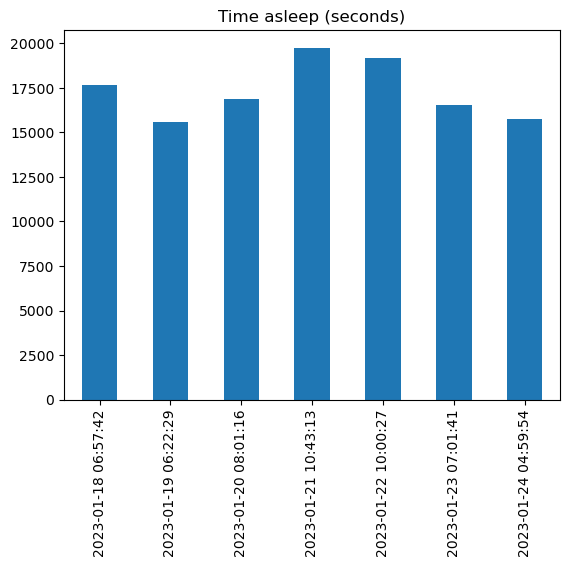

In [126]:
showHistogram(df.iloc[-7:],"End","Time asleep (seconds)")

In [127]:
#Bedtime

#Avg overall bedtime
avg_bedTime = df["Time in bed (seconds)"].mean()
print("The average of bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_bedTime)))

#Avg last 30 days bedtime
avg_30days_bedTime = df["Time in bed (seconds)"].iloc[-30:].mean()
print("The average of last 30 days bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_30days_bedTime)))

#Avg last 7 days bedtime
avg_7days_bedTime = df["Time in bed (seconds)"].iloc[-7:].mean()
print("The average of last 7 days bedtime is:", time.strftime('%H:%M:%S',time.gmtime(avg_7days_bedTime)))

#Yesterday's bedtime
yesterday_bedTime = df["Time in bed (seconds)"].iloc[-1:].mean()
print("Yesterday's bedtime is:",time.strftime('%H:%M:%S',time.gmtime(yesterday_bedTime)))

The average of bedtime is: 06:40:14
The average of last 30 days bedtime is: 06:11:41
The average of last 7 days bedtime is: 06:01:49
Yesterday's bedtime is: 05:38:26


In [128]:
#Time before sleep

#Avg overall time before sleep
avg_time_before_sleep = df["Time before sleep (seconds)"].mean()
print("The average of time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_time_before_sleep)))

#Avg last 30 days time before sleep
avg_30days_time_before_sleep = df["Time before sleep (seconds)"].iloc[-30:].mean()
print("The average of last 30 days time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_30days_time_before_sleep)))

#Avg last 7 days time before sleep
avg_7days_time_before_sleep = df["Time before sleep (seconds)"].iloc[-7:].mean()
print("The average of last 7 days time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(avg_7days_time_before_sleep)))

#Avg overall time before sleep
yesterday_time_before_sleep = df["Time before sleep (seconds)"].iloc[-1:].mean()
print("Yesterday's time before sleep is:",time.strftime('%H:%M:%S',time.gmtime(yesterday_time_before_sleep)))

The average of time before sleep is: 00:17:57
The average of last 30 days time before sleep is: 00:16:17
The average of last 7 days time before sleep is: 00:17:22
Yesterday's time before sleep is: 00:22:33


In [129]:
#Steps

#Avg overall steps
avg_steps = df["Steps"].mean() # There are several days the steps are 0
print("The avergae of overall steps are:", int(avg_steps))

#Avg last 30 days steps
avg_30days_steps = df["Steps"].iloc[-30:].mean() 
print("The avergae of last 30 days steps are:", int(avg_30days_steps))

#Avg last 7 days steps
avg_7days_steps = df["Steps"].iloc[-7:].mean() 
print("The avergae of last 7 days steps are:", int(avg_7days_steps))

#Yesterday's steps
yesterday_steps = df["Steps"].iloc[-1:].mean() 
print("Yesterday's steps are:", int(yesterday_steps))


The avergae of overall steps are: 2792
The avergae of last 30 days steps are: 3135
The avergae of last 7 days steps are: 4419
Yesterday's steps are: 2195


In [130]:
#Sleep quality

#Avg last 30 days sleep quality
avg_30days_sleep_quality = df["Sleep Quality"].iloc[-30:].str.rstrip("%").astype(float).mean()
print("The average of last 30 days sleep quality is: %.1f" % avg_30days_sleep_quality)

#Avg last 7 days sleep quality
avg_7days_sleep_quality = df["Sleep Quality"].iloc[-7:].str.rstrip("%").astype(float).mean()
print("The average of last 7 days sleep quality is: %.1f" % avg_7days_sleep_quality)

#Yesterday sleep quality
yesterday_sleep_quality = df["Sleep Quality"].iloc[-1:].str.rstrip("%").astype(float).mean()
print("Yesterday's sleep quality is: %.1f" % yesterday_sleep_quality)


The average of last 30 days sleep quality is: 59.5
The average of last 7 days sleep quality is: 59.4
Yesterday's sleep quality is: 58.0


In [131]:
#Snore counts

last_30days_snore_counts = df["Did snore"].iloc[-30:].sum()
print("Last 30 days total snore counts:",last_30days_snore_counts,"/ 30")
last_7days_snore_counts = df["Did snore"].iloc[-7:].sum()
print("Last 7 days total snore counts:",last_7days_snore_counts,"/ 7")
yesterday_snore_count = df["Did snore"].iloc[-1:].sum()
print("Did snore yesterday?",yesterday_snore_count == 1)

Last 30 days total snore counts: 30 / 30
Last 7 days total snore counts: 7 / 7
Did snore yesterday? True


In [175]:
def get_sleep_recommendations(sleep_data):
    """
    Returns a list of recommendations for sleeping better ranked in order of importance
    
    Parameters
    ----------
    sleep_data : pandas.DataFrame
        DataFrame containing sleep data
 
    Returns
    -------
    list of str
        List of recommendations for sleeping better ranked in order of importance
    """
    # Check for missing values in sleep_data
    #if sleep_data.isnull().values.any():
    #    return ["Error: Missing values in input data. Please check your data and try again."]
    
    #determine what kind of sleeper the user is based on prev sleep_duration data
    # 1:short-sleeper, 2:average-sleeper, 3:long-sleeper, by default sleeper = 2
    sleeper = -1
    if(len(sleep_data)<7):
        sleeper = 2
    else:
        if(df["Time asleep (seconds)"].iloc[-7:].mean()>=28800):
            sleeper = 3
        elif(df["Time asleep (seconds)"].iloc[-7:].mean()>=23400):
            sleeper = 2
        else:
            sleeper = 1
    # Analyze sleep data and create recommendations
    recommendations = []
    
    # 1. give recommendation based on sleeper type and sleep duration
    recommendations.append(idealSleepTime(sleeper,df["Time asleep (seconds)"].iloc[-1:].mean()))
    
    # 2. give recommendation for bedtime
    
    # 3. give recommendations from List of items and exercises that help with sleep
    
    recommendations.append("1.Get some sunlight during the day.")
    recommendations.append("2.Meditate before bed.")
    recommendations.append("3.Avoid large meals before bed.")
    recommendations.append("4.Avoid naps during the day.")
    recommendations.append("5.Avoid electronics before bed")
    
    return recommendations

In [176]:
recom = get_sleep_recommendations(df)
for i in recom:
    print(i)
    print('\n')

We determine you as a short sleeper. You didn't get enough sleep last night. Try to get at least 6h of sleep(4 sleep cycles).


1.Get some sunlight during the day.


2.Meditate before bed.


3.Avoid large meals before bed.


4.Avoid naps during the day.


5.Avoid electronics before bed




In [7]:
# Adding new data to dataframe
#new_info = [] # from watch
#df.loc[len(df.index)] = new_info
#overwrite the current csv file
df.to_csv('sleepdata.csv',index=False,sep =';',mode='w',float_format = '%.7f') 